In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from statistics import variance

In [6]:
industry_data=pd.read_csv('Industry_Portfolios.csv',header=0,index_col=0,parse_dates=True)
dataRiskFactors=pd.read_csv('Risk_Factors.csv',header=0,index_col=0,parse_dates=True)

In [10]:
#Sharpe Ratio
# num = industry_data.sub(dataRiskFactors.iloc[:,0], axis=0)
R_mean = pd.DataFrame([data[i].mean() for i in data],columns=['Mean Return'],index=industry_data.columns)
R_std = pd.DataFrame([data[i].std() for i in data],columns=['STD'],index=data.columns)
Sharpe_Ratio = pd.DataFrame(R_mean.iloc[:,0]/R_std.iloc[:,0],columns=["Sharpe Ratio"])
num

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
200406,1.58,4.97,5.26,5.48,2.54,0.74,-0.04,-0.57,1.93,1.32
200407,-6.08,-4.79,-4.12,3.14,-8.60,-1.19,-4.13,-6.05,0.96,-2.42
200408,0.66,-2.42,1.16,-1.38,-4.51,1.02,-1.31,1.52,3.55,1.78
200409,-2.12,2.33,1.81,8.83,3.22,1.28,2.50,-1.48,1.31,1.01


       Sortino Ratio
NoDur       0.350804
Durbl       0.111967
Manuf       0.241260
Enrgy       0.273612
HiTec       0.170620
Telcm       0.244940
Shops       0.293032
Hlth        0.270294
Utils       0.290044
Other       0.087351
AxesSubplot(0.125,0.125;0.775x0.755)


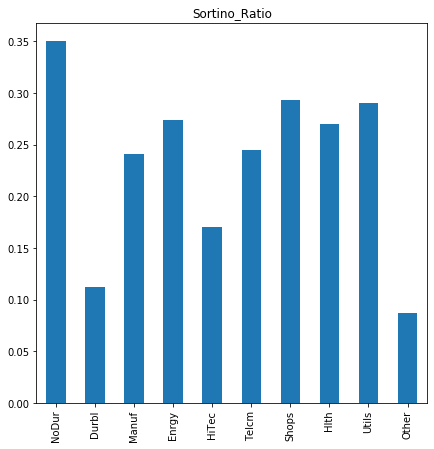

In [4]:
#Sortino Ratio

downside_risk = ((num[num<0].fillna(0))**2).mean()
Sortino_Ratio = pd.DataFrame(R_mean.iloc[:,0].values/downside_risk**(1/2),columns=["Sortino Ratio"])
Sortino_Ratio

       Jensens Alpha
NoDur       0.369717
Durbl      -0.417903
Manuf       0.160494
Enrgy       0.504485
HiTec      -0.064024
Telcm       0.194348
Shops       0.274093
Hlth        0.236968
Utils       0.446523
Other      -0.387508
AxesSubplot(0.125,0.125;0.775x0.755)


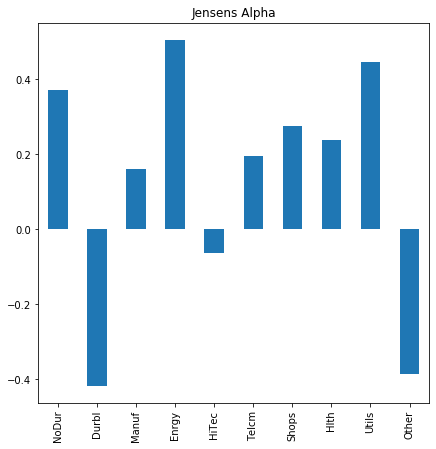

In [5]:
#Jensen's Alpha

Rm_Rf = pd.DataFrame(dataRiskFactors.iloc[:,1])
x = pd.DataFrame([dataRiskFactors.iloc[:,1].mean()])
Rm_Rf_mean = pd.DataFrame(np.repeat(x.values,10,axis=0),index=industry_data.columns,columns=['Mean Return'])
Ri_Rf = R_mean
Regression = LinearRegression()
Regression.fit(Rm_Rf,num)
alpha=pd.DataFrame(Ri_Rf.sub(Regression.coef_*Rm_Rf_mean,axis=1))
alpha.rename(columns = {'Mean Return':'Jensens Alpha'}, inplace = True)
print(alpha)
print(alpha.iloc[:,0].plot(kind='bar',title='Jensens Alpha',figsize=(7,7),legend=False,grid=False))

       Three-Factor Alpha
NoDur            0.386704
Durbl           -0.474342
Manuf            0.153285
Enrgy            0.523007
HiTec           -0.065979
Telcm            0.200724
Shops            0.255941
Hlth             0.257472
Utils            0.474411
Other           -0.404412
AxesSubplot(0.125,0.125;0.775x0.755)


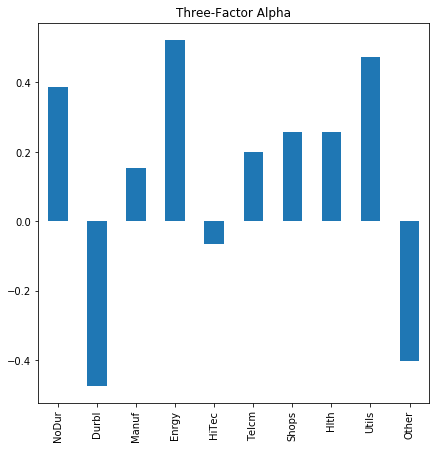

In [6]:
#Three Factor Alpha

model = LinearRegression().fit(dataRiskFactors.iloc[:, 1:4],num)
three_factor_alpha=pd.DataFrame(model.intercept_,columns=['Three-Factor Alpha'],index=industry_data.columns)
print(three_factor_alpha)
print(three_factor_alpha.iloc[:,0].plot(kind='bar',title='Three-Factor Alpha',figsize=(7,7),legend=False,grid=False))

Text(0, 0.5, 'Returns')

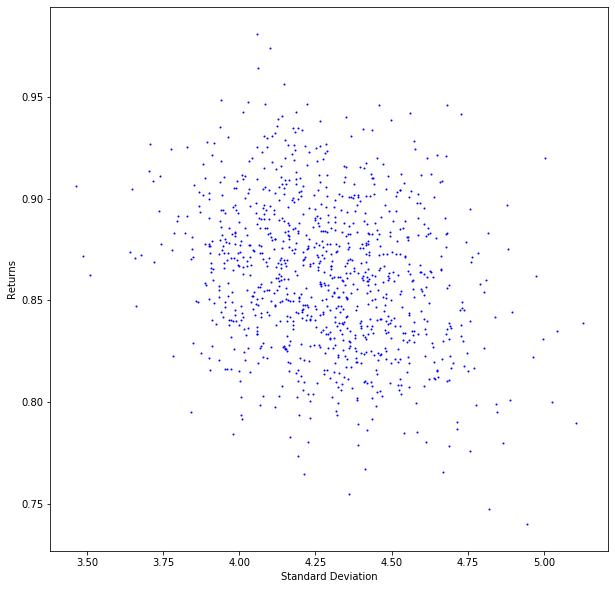

In [7]:
mean_returns=industry_data.mean()
cov_matrix= industry_data.cov()

#Set the number of iterations to 100000 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 1000
simulation_res = np.zeros((4+len(industry_data.columns)-1,num_iterations))

for i in range(num_iterations):
#Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.rand(10))
        weights /= np.sum(weights)
#Calculate the return and standard deviation for every step
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))

#Store all the results in a defined array
        simulation_res[0,i] = portfolio_return
        simulation_res[1,i] = portfolio_std_dev

#Calculate Sharpe ratio and store it in the array
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]

#Save the weights in the array
for j in range(len(weights)):
    simulation_res[j+3,i] = weights[j]
    
sim_frame = pd.DataFrame(simulation_res.T, columns=['ret','stdev','sharpe','NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth','Utils','Other'])

#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.figure(figsize=(10,10))
plt.scatter(sim_frame.stdev,sim_frame.ret,s=1,c='b')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')


Text(0, 0.5, 'Returns')

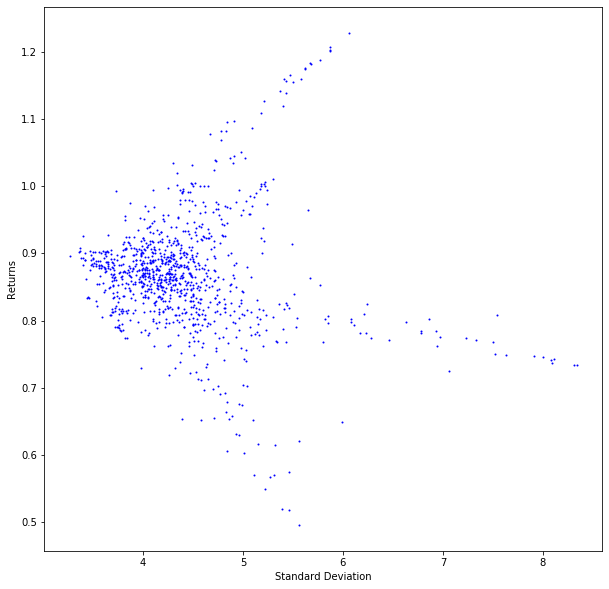

In [8]:
mean_returns=industry_data.mean()
cov_matrix= industry_data.cov()

#Set the number of iterations to 100000 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 1000
simulation_res = np.zeros((4+len(industry_data.columns)-1,num_iterations))

for i in range(num_iterations):
#Select random weights and normalize to set the sum to 1
        weights = 1/(np.array(np.random.random(10)))
        weights /= np.sum(weights)
#Calculate the return and standard deviation for every step
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))

#Store all the results in a defined array
        simulation_res[0,i] = portfolio_return
        simulation_res[1,i] = portfolio_std_dev

#Calculate Sharpe ratio and store it in the array
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]

#Save the weights in the array
for j in range(len(weights)):
    simulation_res[j+3,i] = weights[j]
    
sim_frame = pd.DataFrame(simulation_res.T, columns=['ret','stdev','sharpe','NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth','Utils','Other'])

#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.figure(figsize=(10,10))
plt.scatter(sim_frame.stdev,sim_frame.ret,s=1,c='b')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

In [3]:
cov_matrix

NameError: name 'cov_matrix' is not defined

In [4]:
num

NameError: name 'num' is not defined